In [1]:
import numpy as np
import pandas as pd
import pickle
import lhs
import spatial_plot
import matplotlib.pyplot as plt

In [2]:
df = pd.read_pickle('../emit_data')
print(df.shape)

(22886, 13)


In [3]:
samples = lhs.LatinHypercubeSample_wvr_sza(df, 21, 2)
df.head()

,elev med,zen,slope,wv range,wv med,total cloud fraction,lat,lon,fid,date,time,orbit,scene
0,3.22,36.97,7.65,4.78,1.52,0.10,90.483704,37.149964,emit20220810t034648_o22203_s001,20220810,034648,22203,001
1,2.23,36.66,3.77,0.66,1.79,0.02,91.182553,37.631332,emit20220810t034700_o22203_s001,20220810,034700,22203,001
2,2.06,36.37,1.51,0.40,1.71,0.03,91.891301,38.106329,emit20220810t034712_o22203_s001,20220810,034712,22203,001
3,2.08,36.08,2.58,1.04,1.64,0.03,92.610548,38.577816,emit20220810t034724_o22203_s001,20220810,034724,22203,001
4,2.31,35.81,14.88,4.74,1.81,0.00,93.339586,39.044287,emit20220810t034735_o22203_s001,20220810,034735,22203,001


In [4]:
lhs_samples = df.iloc[samples]
lhs_fids = lhs_samples['fid']
print(lhs_samples.shape)
lhs_samples.head()

(620, 13)


,elev med,zen,slope,wv range,wv med,total cloud fraction,lat,lon,fid,date,time,orbit,scene
21449,0.0,0.85,4.53,0.05,1.74,0.0,49.657727,23.187604,emit20230624t084531_o17506_s002,20230624,084531,17506,002
17760,0.0,3.37,3.01,0.19,0.73,0.0,9.293964,22.280205,emit20230601t110510_o15208_s000,20230601,110510,15208,000
21258,0.0,4.60,1.76,0.24,1.56,0.0,15.064892,28.225343,emit20230623t110413_o17407_s002,20230623,110413,17407,002
21670,0.0,4.76,3.23,0.27,1.89,0.0,-13.344703,21.392349,emit20230625t123653_o17608_s001,20230625,123653,17608,001
21048,0.0,9.23,11.01,0.13,1.00,0.0,11.972550,25.091213,emit20230622t115259_o17308_s001,20230622,115259,17308,001


C:\Users\vpatro\Desktop\scene_analysis\spatial_plot.py:41: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


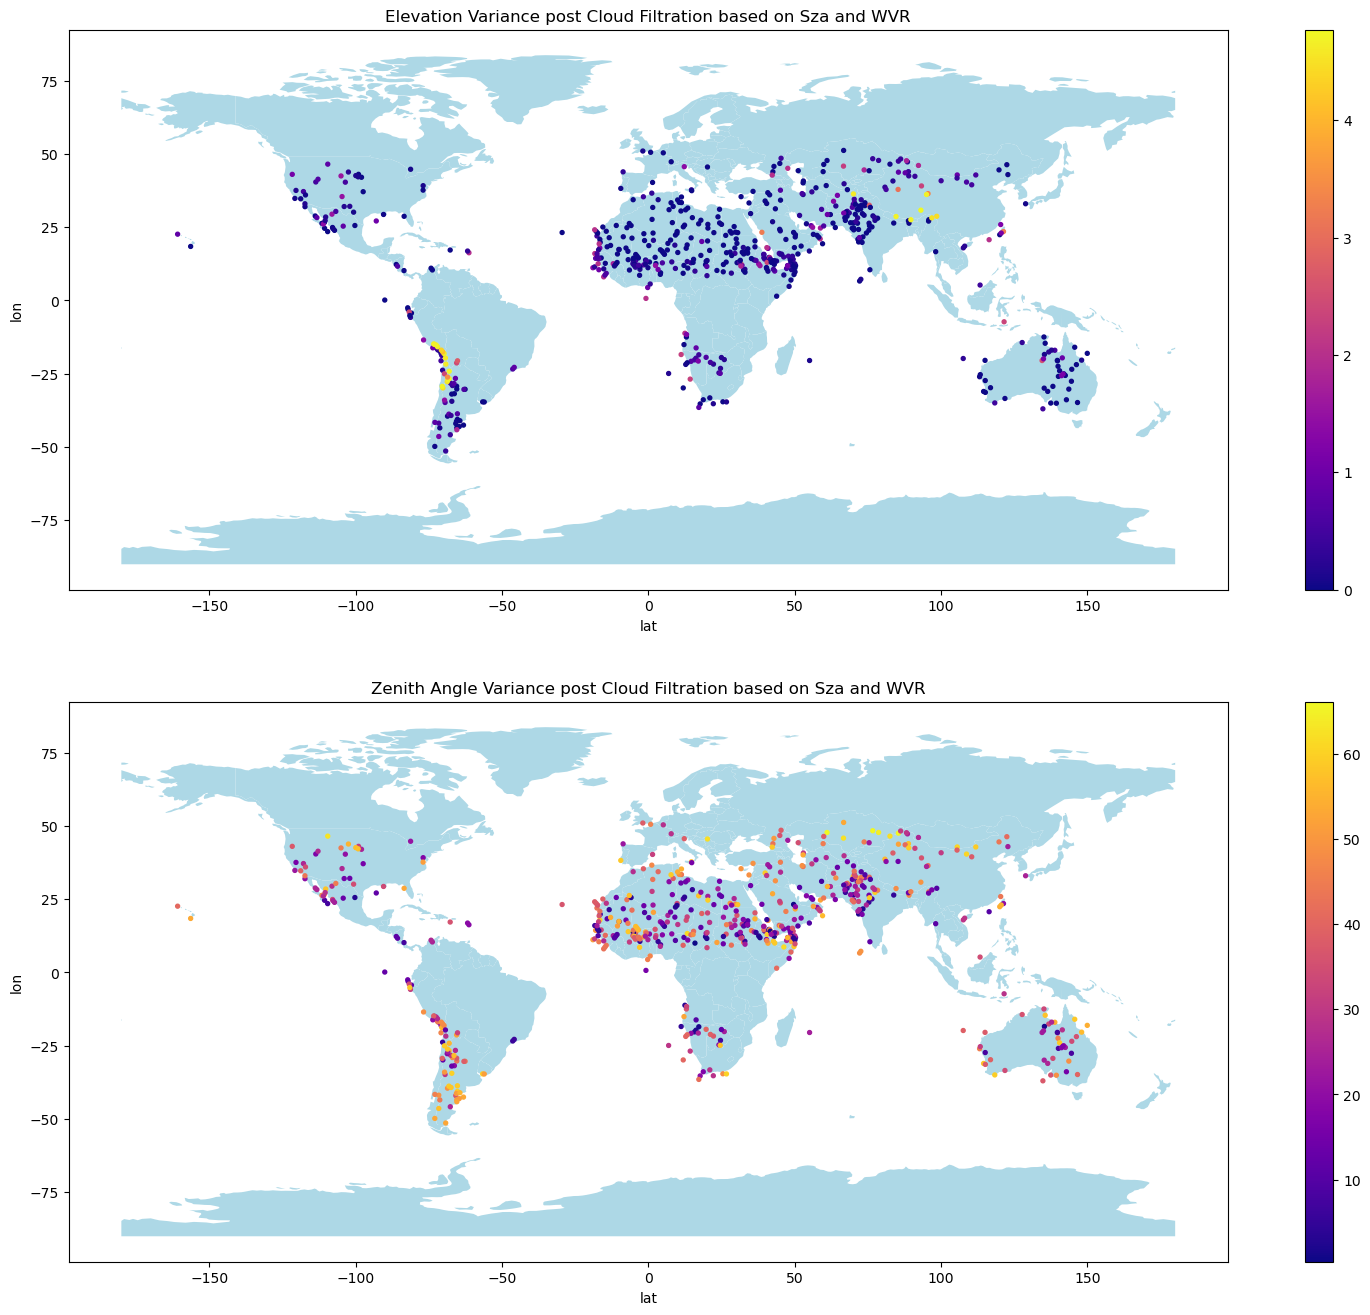

In [5]:
spatial_plot.elev_zen_variance_plt(lhs_samples, ' Sza and WVR')

C:\Users\vpatro\Desktop\scene_analysis\spatial_plot.py:55: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


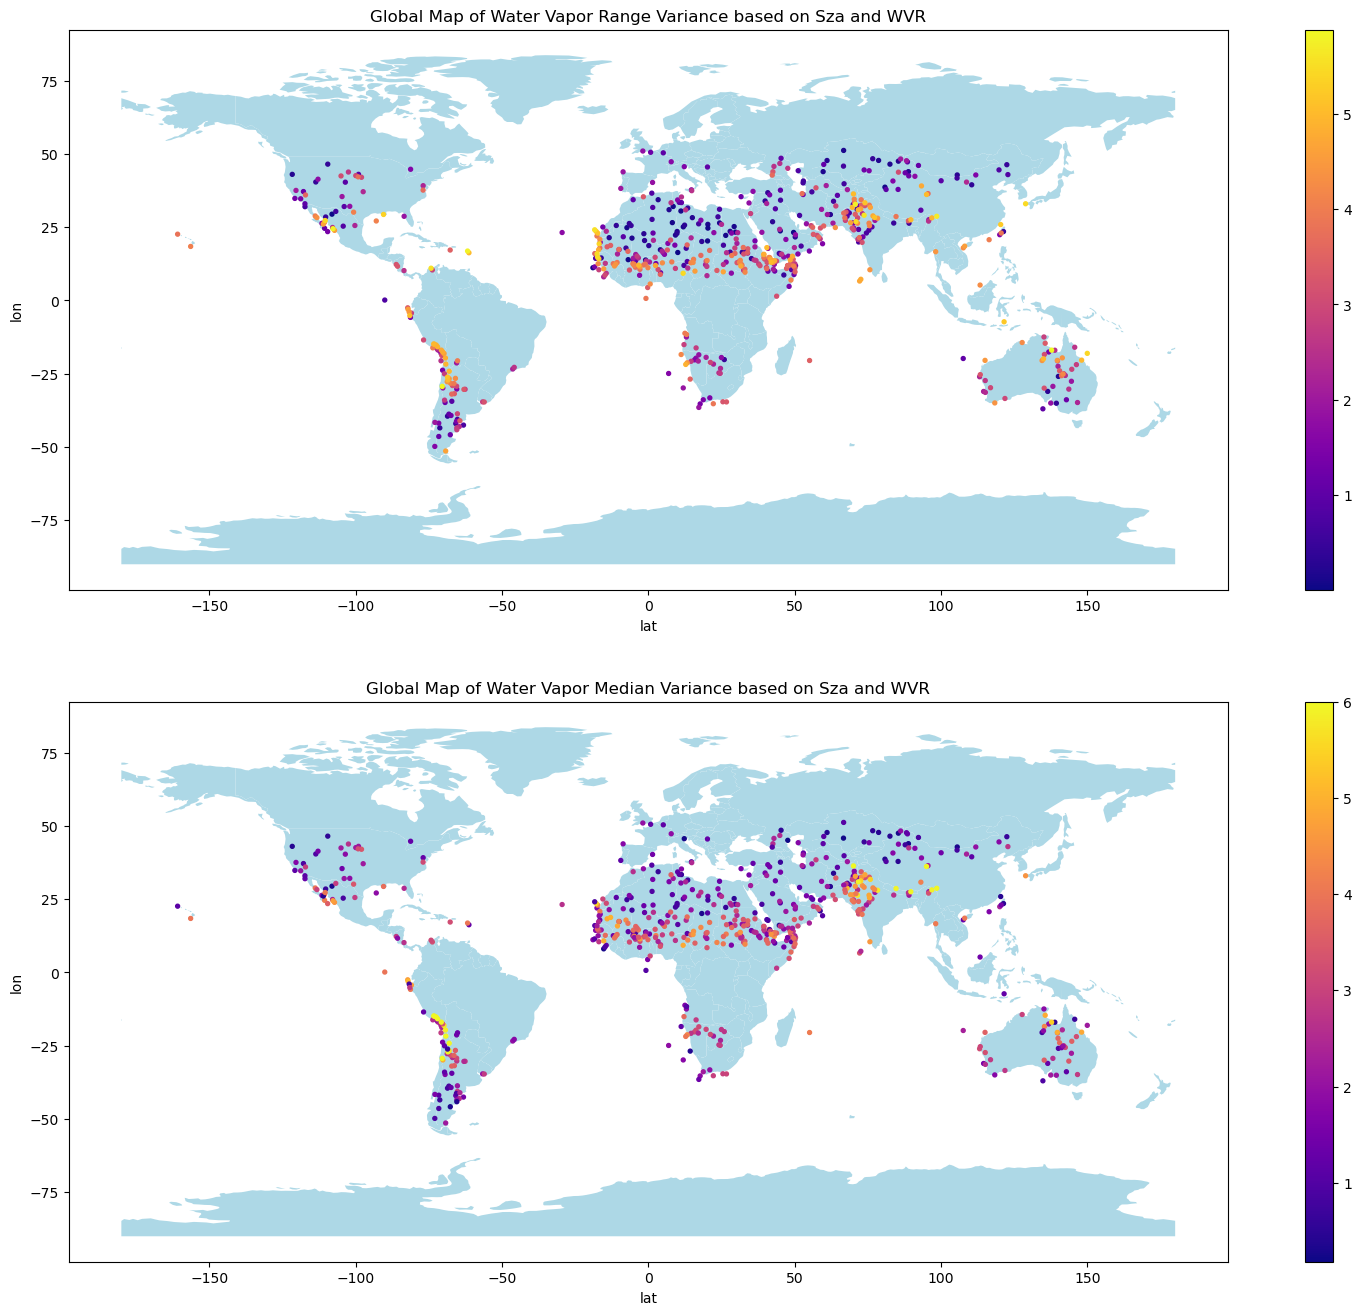

In [6]:
spatial_plot.wv_range_med_variance_plt(lhs_samples, ' Sza and WVR')

Text(0.5, 0, 'Elevation Med (km)')

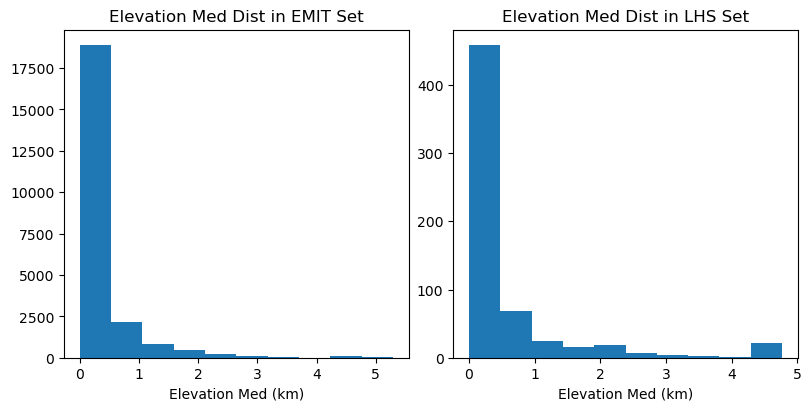

In [7]:
fig, axs = plt.subplots(1, 2, figsize = (8, 4), constrained_layout = True)

axs[0].hist(df['elev med'])
axs[0].set_title('Elevation Med Dist in EMIT Set')
axs[0].set_xlabel('Elevation Med (km)')

axs[1].hist(lhs_samples['elev med'])
axs[1].set_title('Elevation Med Dist in LHS Set')
axs[1].set_xlabel('Elevation Med (km)')


Text(0.5, 0, 'WV Med (g/cm^2)')

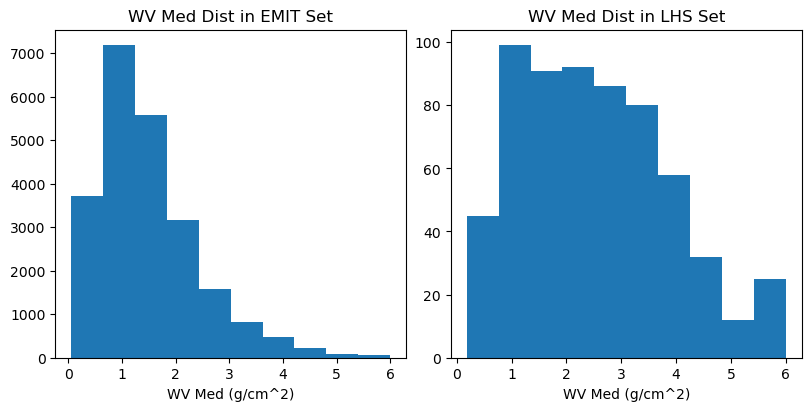

In [8]:
fig, axs = plt.subplots(1, 2, figsize = (8, 4), constrained_layout = True)

axs[0].hist(df['wv med'])
axs[0].set_title('WV Med Dist in EMIT Set')
axs[0].set_xlabel('WV Med (g/cm^2)')

axs[1].hist(lhs_samples['wv med'])
axs[1].set_title('WV Med Dist in LHS Set')
axs[1].set_xlabel('WV Med (g/cm^2)')


Text(0.5, 0, 'WVR (g/cm^2)')

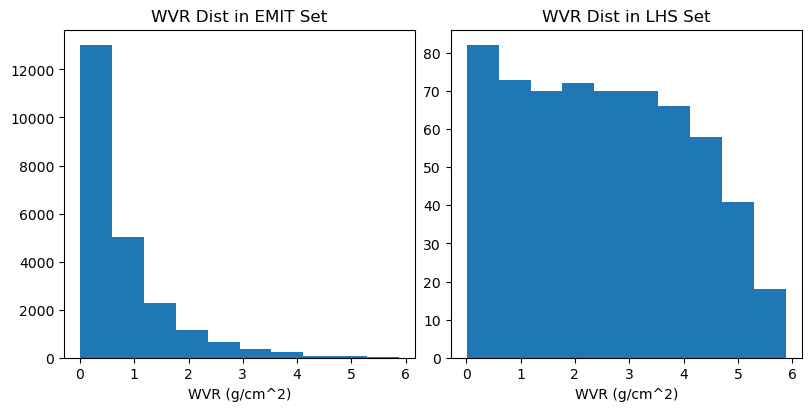

In [9]:
fig, axs = plt.subplots(1, 2, figsize = (8, 4), constrained_layout = True)

axs[0].hist(df['wv range'])
axs[0].set_title('WVR Dist in EMIT Set')
axs[0].set_xlabel('WVR (g/cm^2)')

axs[1].hist(lhs_samples['wv range'])
axs[1].set_title('WVR Dist in LHS Set')
axs[1].set_xlabel('WVR (g/cm^2)')


Text(0.5, 0, 'Slope')

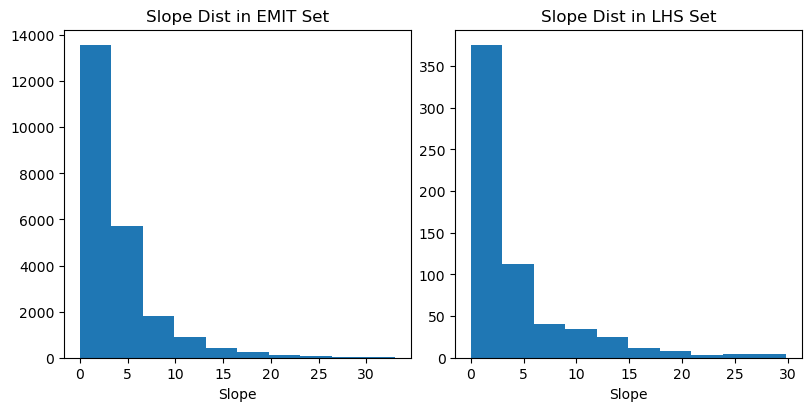

In [10]:
fig, axs = plt.subplots(1, 2, figsize = (8, 4), constrained_layout = True)

axs[0].hist(df['slope'])
axs[0].set_title('Slope Dist in EMIT Set')
axs[0].set_xlabel('Slope')

axs[1].hist(lhs_samples['slope'])
axs[1].set_title('Slope Dist in LHS Set')
axs[1].set_xlabel('Slope')


Text(0, 0.5, 'Elev Med (g/cm^2)')

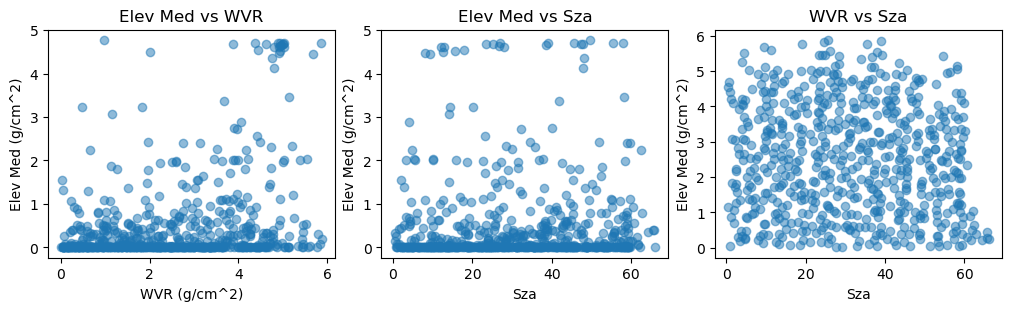

In [11]:
fig, axs = plt.subplots(1, 3, figsize = (10, 3), constrained_layout = True)

axs[0].scatter(lhs_samples['wv range'], lhs_samples['elev med'], alpha = 0.5)
axs[0].set_title('Elev Med vs WVR')
axs[0].set_xlabel('WVR (g/cm^2)')
axs[0].set_ylabel('Elev Med (g/cm^2)')


axs[1].scatter(lhs_samples['zen'], lhs_samples['elev med'], alpha = 0.5)
axs[1].set_title('Elev Med vs Sza')
axs[1].set_xlabel('Sza')
axs[1].set_ylabel('Elev Med (g/cm^2)')

axs[2].scatter(lhs_samples['zen'], lhs_samples['wv range'], alpha = 0.5)
axs[2].set_title('WVR vs Sza')
axs[2].set_xlabel('Sza')
axs[2].set_ylabel('Elev Med (g/cm^2)')

Text(0, 0.5, 'WV Med (g/cm^2)')

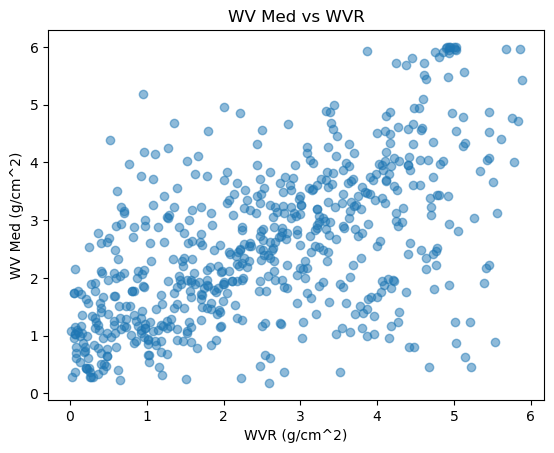

In [13]:
plt.scatter(lhs_samples['wv range'], lhs_samples['wv med'], alpha = 0.5)
plt.title('WV Med vs WVR')
plt.xlabel('WVR (g/cm^2)')
plt.ylabel('WV Med (g/cm^2)')

Text(0, 0.5, 'WV Med (g/cm^2)')

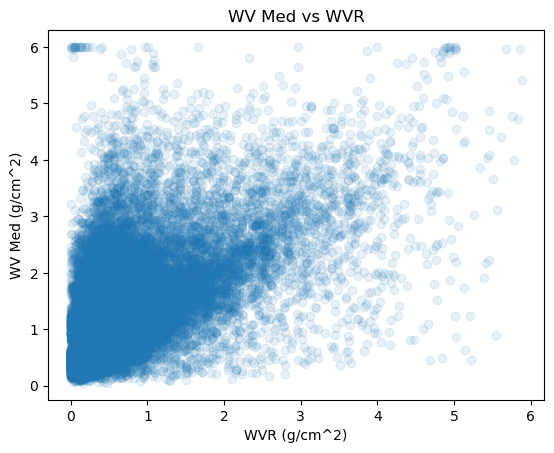

In [15]:
plt.scatter(df['wv range'], df['wv med'], alpha = 0.1)
plt.title('WV Med vs WVR')
plt.xlabel('WVR (g/cm^2)')
plt.ylabel('WV Med (g/cm^2)')

Text(0, 0.5, 'WV Med (g/cm^2)')

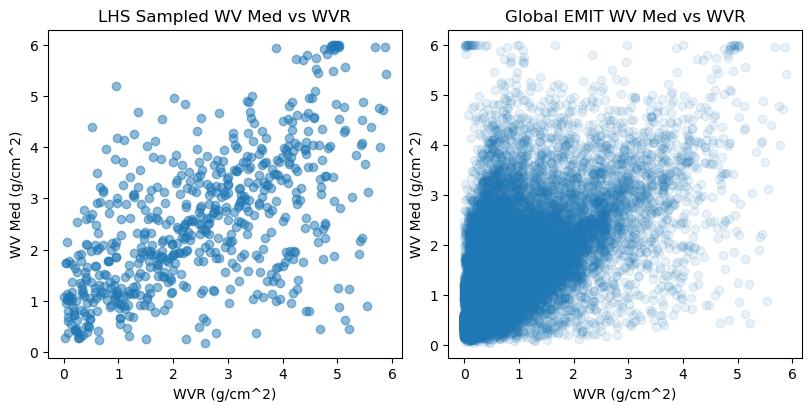

In [19]:
fig, axs = plt.subplots(1, 2, figsize = (8, 4), constrained_layout = True)

axs[0].scatter(lhs_samples['wv range'], lhs_samples['wv med'], alpha = 0.5)
axs[0].set_title('LHS Sampled WV Med vs WVR')
axs[0].set_xlabel('WVR (g/cm^2)')
axs[0].set_ylabel('WV Med (g/cm^2)')

axs[1].scatter(df['wv range'], df['wv med'], alpha = 0.1)
axs[1].set_title('Global EMIT WV Med vs WVR')
axs[1].set_xlabel('WVR (g/cm^2)')
axs[1].set_ylabel('WV Med (g/cm^2)')

